In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
f = lambda x,y,x0,y0 : (x-x0)**2 + (y-y0)**2 

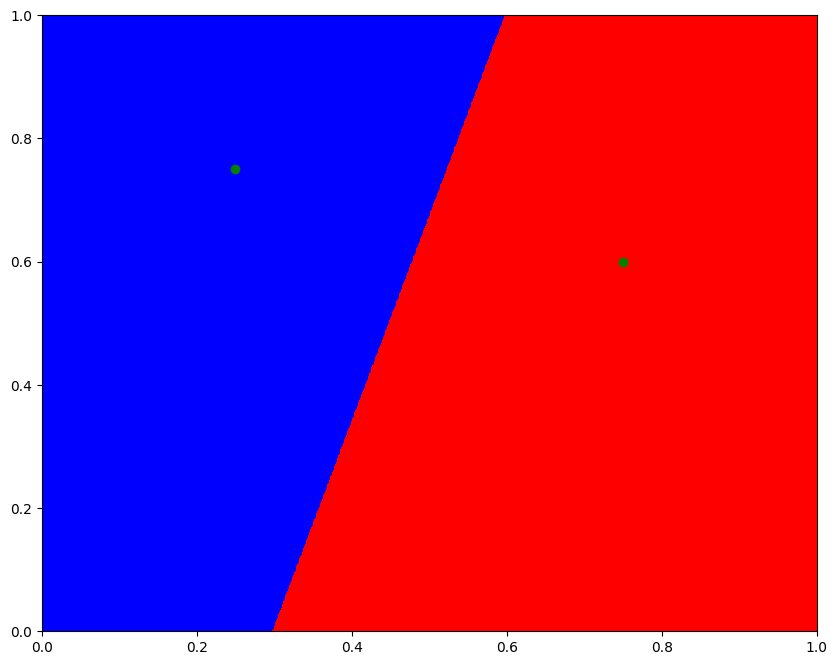

In [4]:
x = [0.25,0.75]
y = [0.75,0.6]
# Create coordinate meshgrid
x_p, y_p = np.meshgrid(np.linspace(0,1,1001), np.linspace(0,1,1001))

# Calculate distances vectorized
d1 = f(x_p, y_p, x[0], y[0])
d2 = f(x_p, y_p, x[1], y[1])

# Create mask for different regions
mask = np.zeros_like(x_p)
mask[d1 > d2] = 1
mask[d1 < d2] = 2
mask[d1 == d2] = 3

# Plot using pcolormesh
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(10,8))
plt.pcolormesh(x_p, y_p, mask, cmap=ListedColormap(['r', 'b', 'k']))
plt.scatter(x, y, color='g')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()


100%|██████████| 20/20 [00:00<00:00, 274.07it/s]


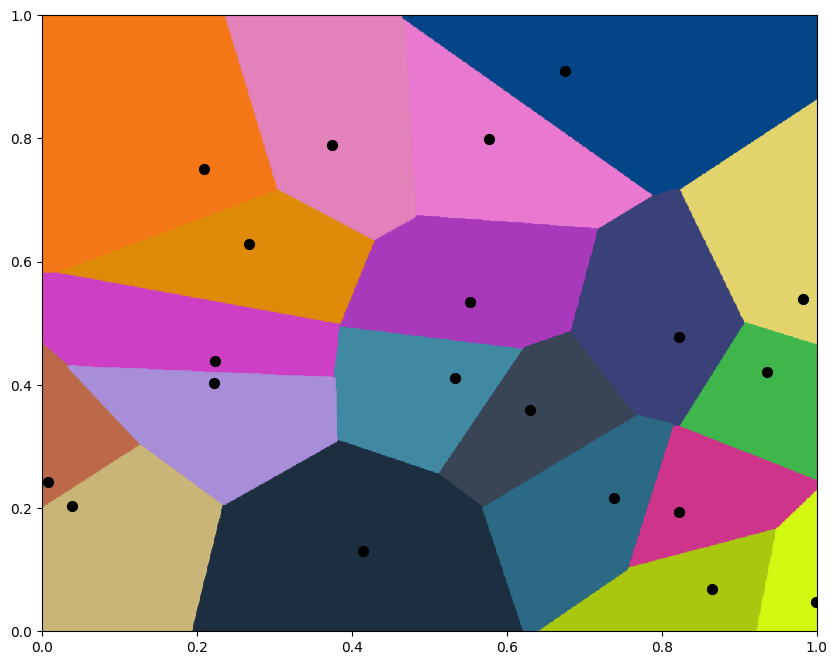

In [5]:
def Domain(n):
    x = np.random.rand(n)
    y = np.random.rand(n)
    x_p, y_p = np.meshgrid(np.linspace(0,1,1001), np.linspace(0,1,1001))
    d = np.array([f(x_p,y_p,x[i],y[i]) for i in range(len(x))])

    mask = np.ones_like(d, dtype=bool)
    masks = []
    for i in range(len(x)):
        current_mask = mask.copy()
        for j in range(len(x)):
            if i != j:
                current_mask = np.logical_and(current_mask, d[i] < d[j])
        masks.append(current_mask)
    mask = masks

    colors = np.random.rand(len(x), 3)

    plt.figure(figsize=(10, 8))
    for i in tqdm(range(len(x))):
        plt.scatter(x_p[mask[i][0]], y_p[mask[i][0]], color=colors[i], s=1, alpha=0.5)
    plt.scatter(x, y, color='black', s=50)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.show()

Domain(20)

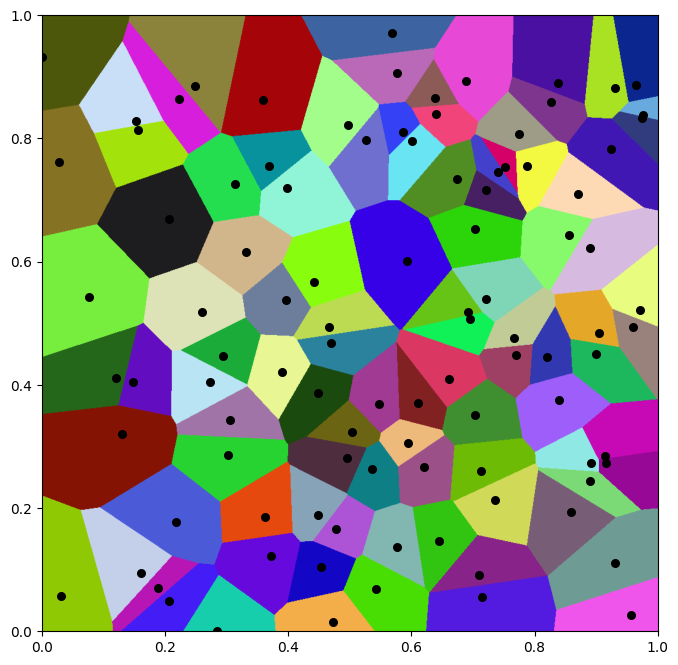

In [6]:
def Domain2(n):
    x = np.random.rand(n)
    y = np.random.rand(n)
    
    x_p, y_p = np.meshgrid(np.linspace(0,1,1001), np.linspace(0,1,1001))
    d = np.sqrt((x_p[..., None] - x)**2 + (y_p[..., None] - y)**2)
    
    regions = np.argmin(d, axis=2)
    
    colors = np.random.rand(n, 3)
    img = colors[regions]
    
    plt.figure(figsize=(8, 8))
    plt.imshow(img, origin='lower', extent=[0, 1, 0, 1])
    plt.scatter(x, y, c='black', s=30)
    plt.show()
Domain2(100)

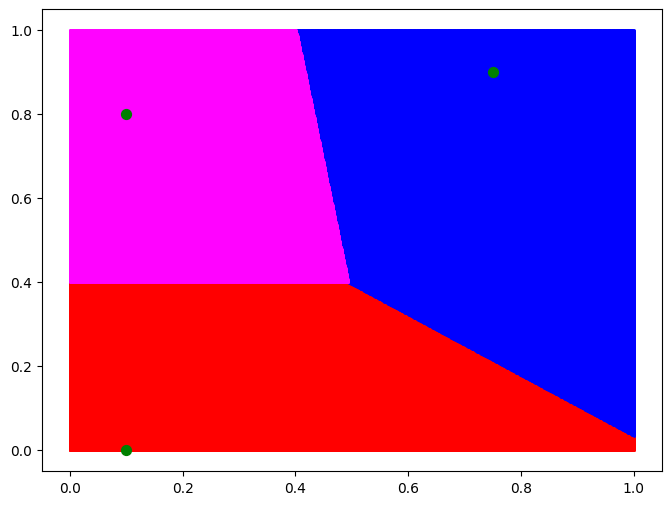

In [7]:
x = [0.1,0.75,0.1]
y = [0,0.9,0.8]
# Create coordinate meshgrid
x_p, y_p = np.meshgrid(np.linspace(0,1,1001), np.linspace(0,1,1001))

# Calculate distances vectorized
d1 = f(x_p, y_p, x[0], y[0])
d2 = f(x_p, y_p, x[1], y[1])
d3 = f(x_p,y_p,x[2],y[2])

mask1 = (d1 < d2) & (d1 < d3)
mask2 = (d2 < d1) & (d2 < d3)
mask3 = (d3 < d1) & (d3 < d2)

plt.figure(figsize=(8,6))
plt.scatter(x_p[mask1], y_p[mask1], color='r', s=1)
plt.scatter(x_p[mask2], y_p[mask2], color='b', s=1)
plt.scatter(x_p[mask3], y_p[mask3], color='#FF03FF', s=1)
plt.scatter(x, y, color='g', s=50)
plt.show()

In [8]:
# np.count_nonzero(mask3)